# Figure 3

This notebook reproduces Figure 3 from the paper, comparing metric distortions of POA and MDS embeddings on a random tree.


In [2]:
import sys
sys.path.append('..')
from poa_utils import *

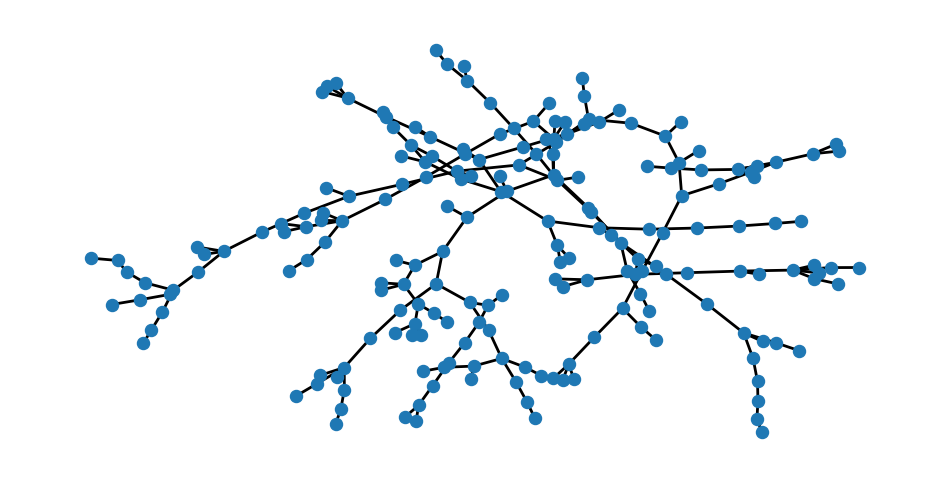

In [2]:
# Generate a 200 Node Tree
N=200
np.random.seed(18)
T=nx.random_tree(N,seed=25)

fig, ax = plt.subplots(figsize=(12,6))
nx.draw_networkx(T, with_labels=False, ax=ax, node_size=75, width=2.0)
plt.box(False)

In [3]:
# Apply 3D POA
k = 3 
np.random.seed(18)
T_POA= poa_network(T,k)
delta_1 = metric_distortion(T,T_POA, POA = True)


In [4]:
# Apply 3D MDS
mds = MDS(n_components=k, dissimilarity='precomputed',random_state = 42)
T_distance = nx.floyd_warshall_numpy(T) ## Turn the graph into a distance matrix 
T_MDS = mds.fit_transform(T_distance)
delta_2 = metric_distortion(T, T_MDS, POA = False)


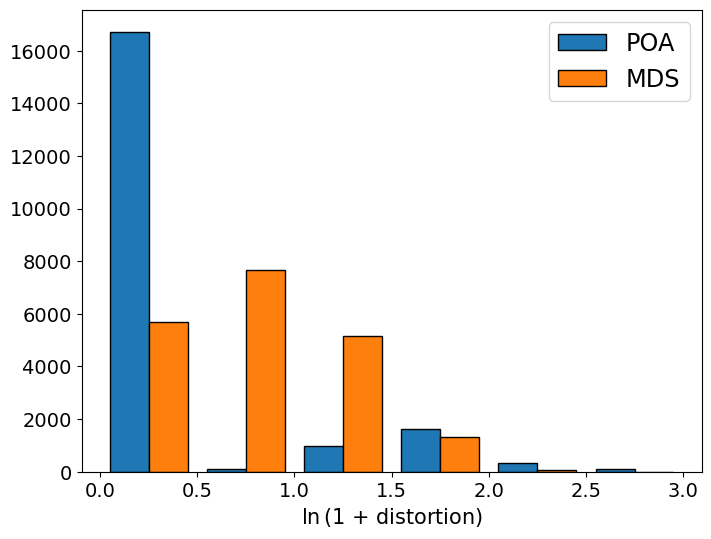

In [5]:
plt.figure(figsize=(8, 6))
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3]

plt.hist([np.log(delta_1 + 1), np.log(delta_2 + 1)], bins=bins, edgecolor='black')

plt.legend(['POA', 'MDS'], fontsize="xx-large")
plt.xlabel(r'$\ln$(1 + distortion)', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()